# ASSIGNMENT 19 - CLUSTERING AND REGRESSION

### Contexto

Você é um cientista de dados e precisa desenvolver um projeto para o banco digital em expansão. Este banco irá anunciar a função crédito para os novos clientes que entrarem, baseando-se nos dados de movimentações deles de outros bancos e dos nossos clientes. Tem um conjunto de dados com 18 colunas, descritas abaixo. São aproximadamente dados de 9000 clientes e seus comportamentos financeiros como dinheiro em conta, frequência de movimentações, pagamentos com cartões, compras parceladas e limite de crédito.

O dataset está disponível na plataforma Kaggle, pelo link: https://www.kaggle.com/arjunbhasin2013/ccdata

### Projeto

Os dados que você recebeu são dados brutos de quase 9000 clientes de outros bancos que também podem se tornar novos clientes. Uma forma de cativar e adquirir novos clientes é oferecendo um crédito justo, baseado nestes dados que você coletou. Você deve então realizar duas modelagens, uma para criar rótulos (labels) para os clientes agrupando eles por comportamentos e em seguida, utilizar dessa nova feature para criar um modelo de regressão que irá propor um crédito para o cliente baseado-se nestes dados. Abaixo, estão expostas algumas etapas SUGERIDAS para você realizar no projeto.

OBS: O desenvolvimento e a decisão do modelo é totalmente sua, portanto se achar que deve utilizar um valor/procedimento diferente, sinta-se livre para fazer os testes e validar suas hipóteses para achar o resultado coerente.

#1) IMPORTAÇÃO DE BIBLIOTECAS

In [2]:
#Importação de bibliotecas para execução das linhas de código

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

# 2) Importação do Dataset

In [4]:
from google.colab import files
uploaded = files.upload()

## link do arquivo no https://www.kaggle.com/arjunbhasin2013/ccdata

Saving CreditCard.csv to CreditCard.csv


In [5]:
import io

df = pd.read_csv(io.BytesIO(uploaded["CreditCard.csv"]))


# 3) Estatística Descritiva

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [8]:
df.shape

(8950, 18)

In [9]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
df.describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95, 0.99], )

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
10%,23.575529,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,179.617069,106.034864,0.000000,10.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
90%,4338.563657,1.000000,2542.624000,1600.099000,1140.070000,3065.534560,1.000000,0.750000,1.000000,0.416667,10.000000,37.000000,9500.000000,3923.906642,1780.651744,0.670000,12.000000
95%,5909.111808,1.000000,3998.619500,2671.094000,1750.087500,4647.169122,1.000000,1.000000,1.000000,0.583333,15.000000,57.000000,12000.000000,6082.090595,2766.563310,1.000000,12.000000


## * DICIONÁRIO DAS COLUNAS (FEATURES)

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

# 4) EXPLORAÇÃO DOS DADOS E LIMPEZA DOS DADOS

## 4.1) Verificação e remoção de outliers

Como é possível verificar de acordo com os percentuais gerados a partir da função *describe*, o dataset possui outliers significativos. Portanto, a remoção será feita a partir do percentil 95.

In [19]:
# Colunas utilizadas
columns = ['BALANCE','PURCHASES','MINIMUM_PAYMENTS', 'PAYMENTS', 'CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES', 'CASH_ADVANCE','CASH_ADVANCE_TRX']
print(columns)

['BALANCE', 'PURCHASES', 'MINIMUM_PAYMENTS', 'PAYMENTS', 'CREDIT_LIMIT', 'PURCHASES_TRX', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX']


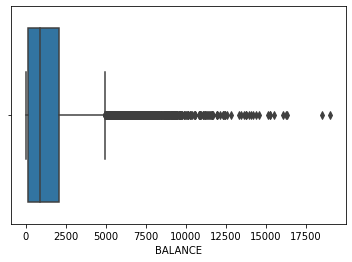

In [20]:
sns.boxplot(data=df, x=df['BALANCE'])
plt.show()

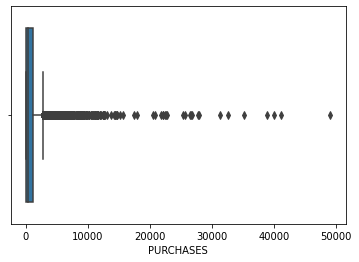

In [21]:
sns.boxplot(data=df, x=df['PURCHASES'])
plt.show()

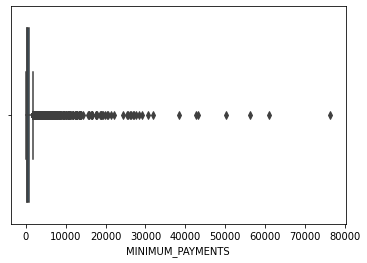

In [22]:
sns.boxplot(data=df, x=df['MINIMUM_PAYMENTS'])
plt.show()

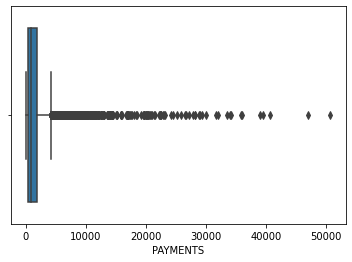

In [23]:
sns.boxplot(data=df, x=df['PAYMENTS'])
plt.show()

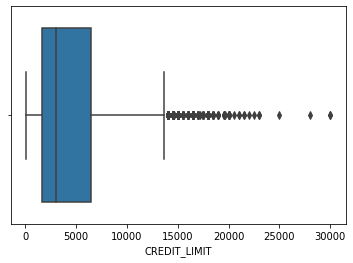

In [24]:
sns.boxplot(data=df, x=df['CREDIT_LIMIT'])
plt.show()

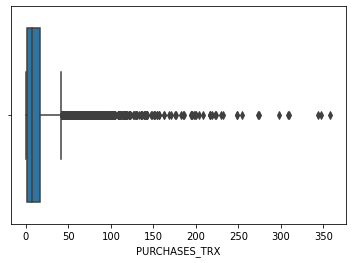

In [25]:
sns.boxplot(data=df, x=df['PURCHASES_TRX'])
plt.show()

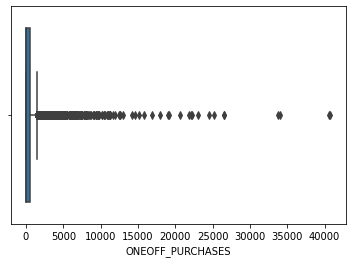

In [26]:
sns.boxplot(data=df, x=df['ONEOFF_PURCHASES'])
plt.show()

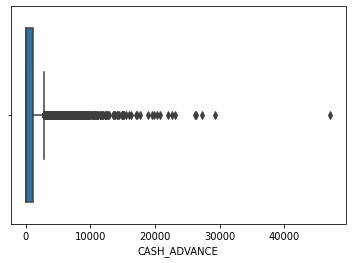

In [27]:
sns.boxplot(data=df, x=df['CASH_ADVANCE'])
plt.show()

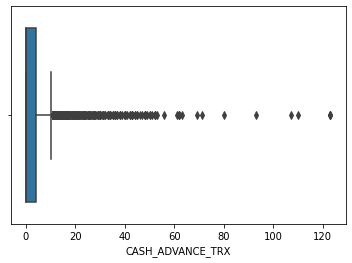

In [28]:
sns.boxplot(data=df, x=df['CASH_ADVANCE_TRX'])
plt.show()

In [36]:
#Selecionando apenas os dados do percentile 95

balance = df['BALANCE'].quantile(0.95)
purchases = df['PURCHASES'].quantile(0.95)
minimum_payments = df['MINIMUM_PAYMENTS'].quantile(0.95)
payments = df['PAYMENTS'].quantile(0.95)
credit_limit = df['CREDIT_LIMIT'].quantile(0.95)
purchases_trx = df['PURCHASES_TRX'].quantile(0.95)
oneoff_purchases = df['ONEOFF_PURCHASES'].quantile(0.95)
cash_advanced = df['CASH_ADVANCE'].quantile(0.95)
cash_advanced_trx = df['CASH_ADVANCE_TRX'].quantile(0.95)

In [37]:
df_clean = df.loc[df['BALANCE'] <= balance]
df_clean = df_clean.loc[df_clean['PURCHASES'] <= purchases]
df_clean = df_clean.loc[df_clean['MINIMUM_PAYMENTS'] <= minimum_payments]
df_clean = df_clean.loc[df_clean['PAYMENTS'] <= payments]
df_clean = df_clean.loc[df_clean['CREDIT_LIMIT'] <= credit_limit]
df_clean = df_clean.loc[df_clean['PURCHASES_TRX'] <= purchases_trx]
df_clean = df_clean.loc[df_clean['ONEOFF_PURCHASES'] <= oneoff_purchases]
df_clean = df_clean.loc[df_clean['CASH_ADVANCE'] <= cash_advanced]
df_clean = df_clean.loc[df_clean['CASH_ADVANCE_TRX'] <= cash_advanced_trx]

In [39]:
df_clean.describe(percentiles=[0.1, 0.25, 0.75, 0.9, 0.95, 0.99], )

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000,6666.000000
mean,1027.717234,0.878906,595.092798,307.789365,287.595764,513.199913,0.475423,0.167297,0.350893,0.103364,1.904740,10.002850,3516.167655,1017.025557,432.240582,0.159951,11.488749
std,1201.154985,0.221320,731.986075,523.555954,460.620559,917.504781,0.392192,0.264044,0.387053,0.156280,3.122998,11.488021,2545.074394,978.798553,450.762005,0.294802,1.375799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.049513,0.019163,0.000000,6.000000
10%,21.947211,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,191.673806,93.337707,0.000000,10.000000
25%,88.844215,0.857143,45.112500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,350.663880,155.968184,0.000000,12.000000
50%,622.827610,1.000000,322.050000,0.000000,82.175000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,7.000000,2700.000000,684.856219,236.288334,0.000000,12.000000
75%,1504.703845,1.000000,858.325000,412.635000,401.520000,695.897538,0.916667,0.250000,0.750000,0.166667,3.000000,14.000000,5000.000000,1340.540425,559.166218,0.166667,12.000000
90%,2710.638201,1.000000,1672.670000,1068.910000,848.205000,1830.421511,1.000000,0.583333,1.000000,0.333333,6.000000,26.000000,7500.000000,2290.766642,1039.699291,0.700000,12.000000
95%,3639.988931,1.000000,2235.872500,1513.325000,1230.217500,2685.682729,1.000000,0.833333,1.000000,0.416667,9.000000,35.000000,9000.000000,3093.650747,1394.640275,1.000000,12.000000


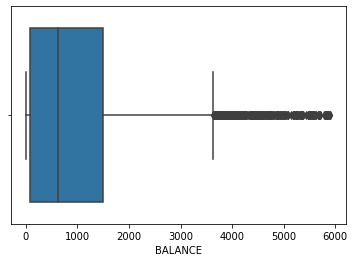

In [40]:
sns.boxplot(data=df_clean, x=df_clean['BALANCE'])
plt.show()

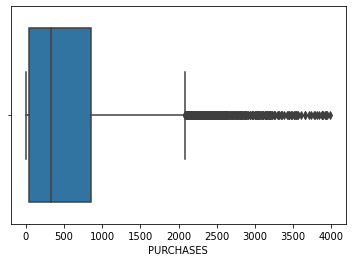

In [41]:
sns.boxplot(data=df_clean, x=df_clean['PURCHASES'])
plt.show()

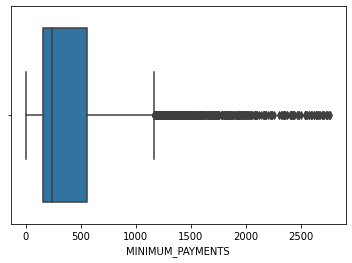

In [42]:
sns.boxplot(data=df_clean, x=df_clean['MINIMUM_PAYMENTS'])
plt.show()

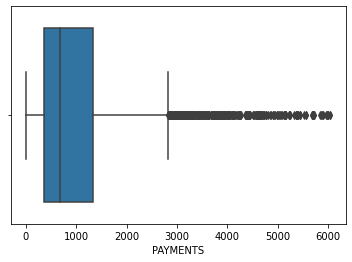

In [43]:
sns.boxplot(data=df_clean, x=df_clean['PAYMENTS'])
plt.show()

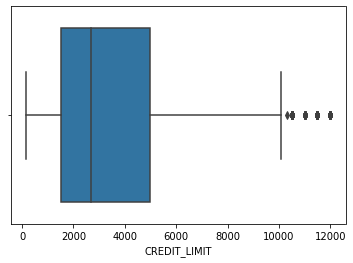

In [44]:
sns.boxplot(data=df_clean, x=df_clean['CREDIT_LIMIT'])
plt.show()

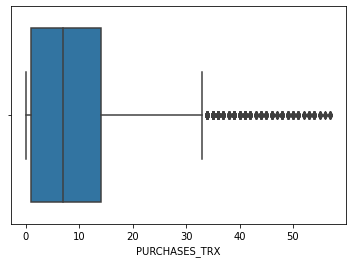

In [45]:
sns.boxplot(data=df_clean, x=df_clean['PURCHASES_TRX'])
plt.show()

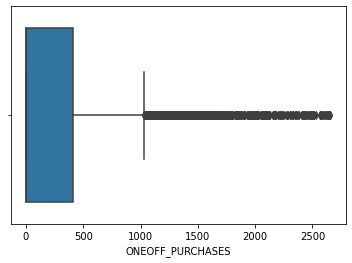

In [46]:
sns.boxplot(data=df_clean, x=df_clean['ONEOFF_PURCHASES'])
plt.show()

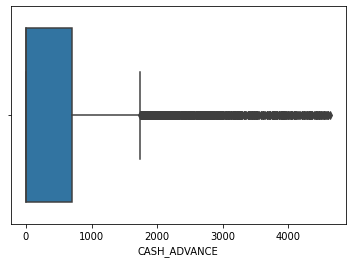

In [47]:
sns.boxplot(data=df_clean, x=df_clean['CASH_ADVANCE'])
plt.show()

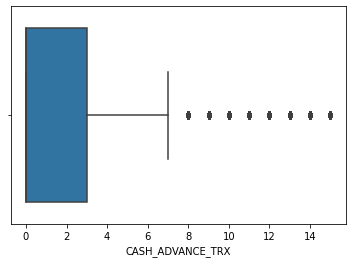

In [48]:
sns.boxplot(data=df_clean, x=df_clean['CASH_ADVANCE_TRX'])
plt.show()

## 4.1) Verificação e remoção de valores nulos

In [49]:
#check null values
df_clean.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [54]:
#check duplicated values
df_clean.duplicated().sum()

0

In [55]:
df_clean.nunique()

CUST_ID                             6666
BALANCE                             6661
BALANCE_FREQUENCY                     42
PURCHASES                           4617
ONEOFF_PURCHASES                    2786
INSTALLMENTS_PURCHASES              3287
CASH_ADVANCE                        2958
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            45
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                47
CASH_ADVANCE_TRX                      16
PURCHASES_TRX                         58
CREDIT_LIMIT                         147
PAYMENTS                            6666
MINIMUM_PAYMENTS                    6665
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [56]:
#checando a quantidade de valores vazios
df_clean.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [57]:
# drop de colunas que não são interessantes para a análise, no caso a coluna CUST_ID
df_clean = df_clean.drop(['CUST_ID'], axis=1)
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12
4,817.714335,1.000000,16.00,16.00,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.0,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12


A remoção da coluna CUST_ID é realizada pois ela apenas indica o cadastro do cliente.

In [59]:
df_clean.shape

(6666, 17)

# 5) VISUALIZAÇÃO DOS DADOS

In [64]:
df_clean.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.375390,-0.018244,0.065380,-0.103584,0.457858,-0.193880,0.032906,-0.192358,0.425781,0.408206,-0.054730,0.304850,0.190385,0.769316,-0.401027,0.069236
BALANCE_FREQUENCY,0.375390,1.000000,0.150581,0.105259,0.119393,0.092562,0.217827,0.164265,0.168885,0.177189,0.157590,0.213731,0.046467,0.049967,0.328450,-0.164552,0.093323
PURCHASES,-0.018244,0.150581,1.000000,0.779917,0.702441,-0.183299,0.576183,0.553368,0.435667,-0.221394,-0.201223,0.726285,0.262488,0.407471,0.027238,0.186890,0.090525
ONEOFF_PURCHASES,0.065380,0.105259,0.779917,1.000000,0.102530,-0.107766,0.293565,0.716215,0.023169,-0.117160,-0.107752,0.488205,0.246900,0.325728,0.028797,0.029774,0.057337
INSTALLMENTS_PURCHASES,-0.103584,0.119393,0.702441,0.102530,1.000000,-0.169081,0.582189,0.065109,0.666327,-0.218768,-0.197433,0.599612,0.136369,0.276977,0.010484,0.262906,0.078665
CASH_ADVANCE,0.457858,0.092562,-0.183299,-0.107766,-0.169081,1.000000,-0.315745,-0.124517,-0.262995,0.659614,0.692511,-0.212767,0.126072,0.274764,0.307942,-0.225594,-0.133982
PURCHASES_FREQUENCY,-0.193880,0.217827,0.576183,0.293565,0.582189,-0.315745,1.000000,0.419433,0.864183,-0.355641,-0.324044,0.764940,0.101281,0.087319,-0.066515,0.319360,0.023135
ONEOFF_PURCHASES_FREQUENCY,0.032906,0.164265,0.553368,0.716215,0.065109,-0.124517,0.419433,1.000000,0.008766,-0.115273,-0.108737,0.531497,0.255105,0.217569,0.007984,0.071118,0.054404
PURCHASES_INSTALLMENTS_FREQUENCY,-0.192358,0.168885,0.435667,0.023169,0.666327,-0.262995,0.864183,0.008766,1.000000,-0.302980,-0.273994,0.670919,0.025438,0.045707,-0.060636,0.286059,0.038661
CASH_ADVANCE_FREQUENCY,0.425781,0.177189,-0.221394,-0.117160,-0.218768,0.659614,-0.355641,-0.115273,-0.302980,1.000000,0.896859,-0.228761,-0.011978,0.130492,0.285098,-0.272259,-0.168891


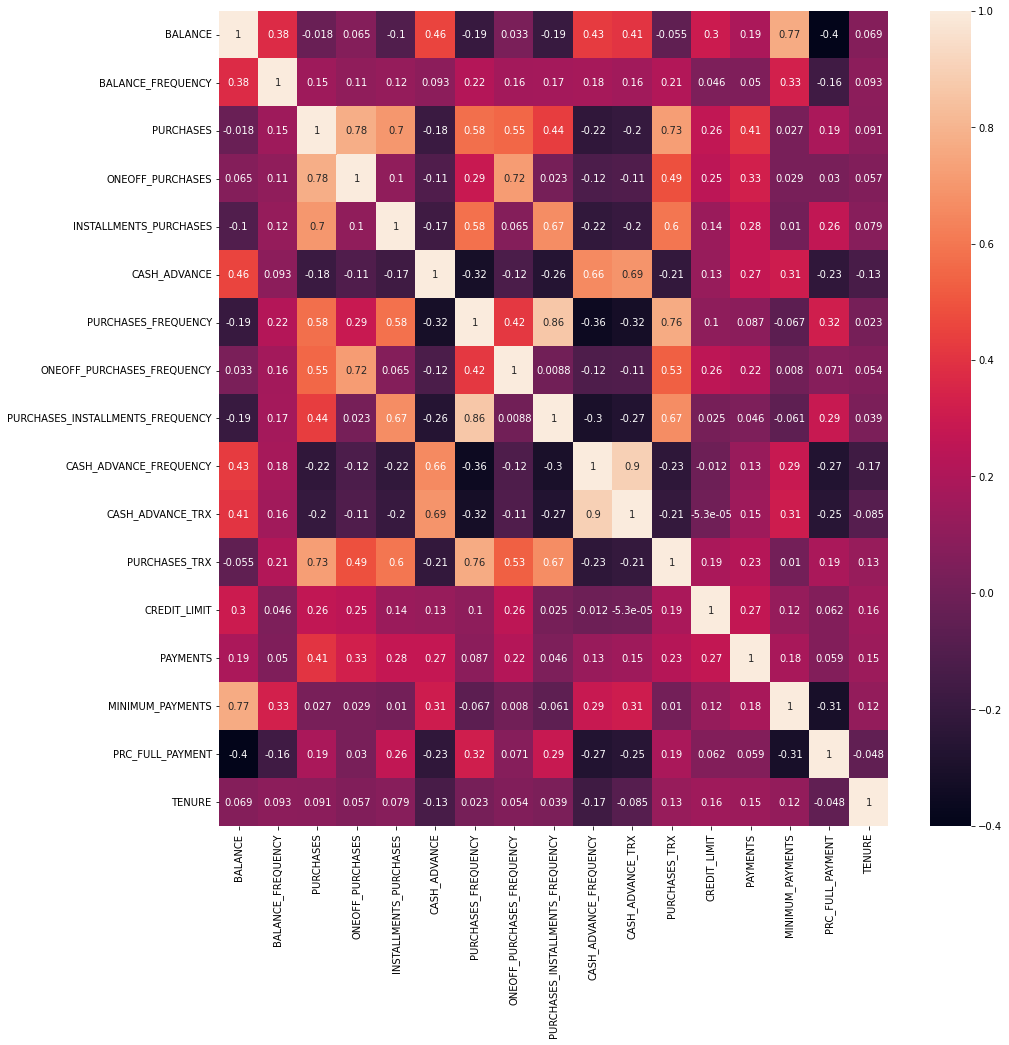

In [77]:
#plotagem da correlação dos dados
plt.figure(figsize=(15,15))
sns.heatmap(df_clean.corr(), annot=True)
plt.show()

<Figure size 1080x1080 with 0 Axes>

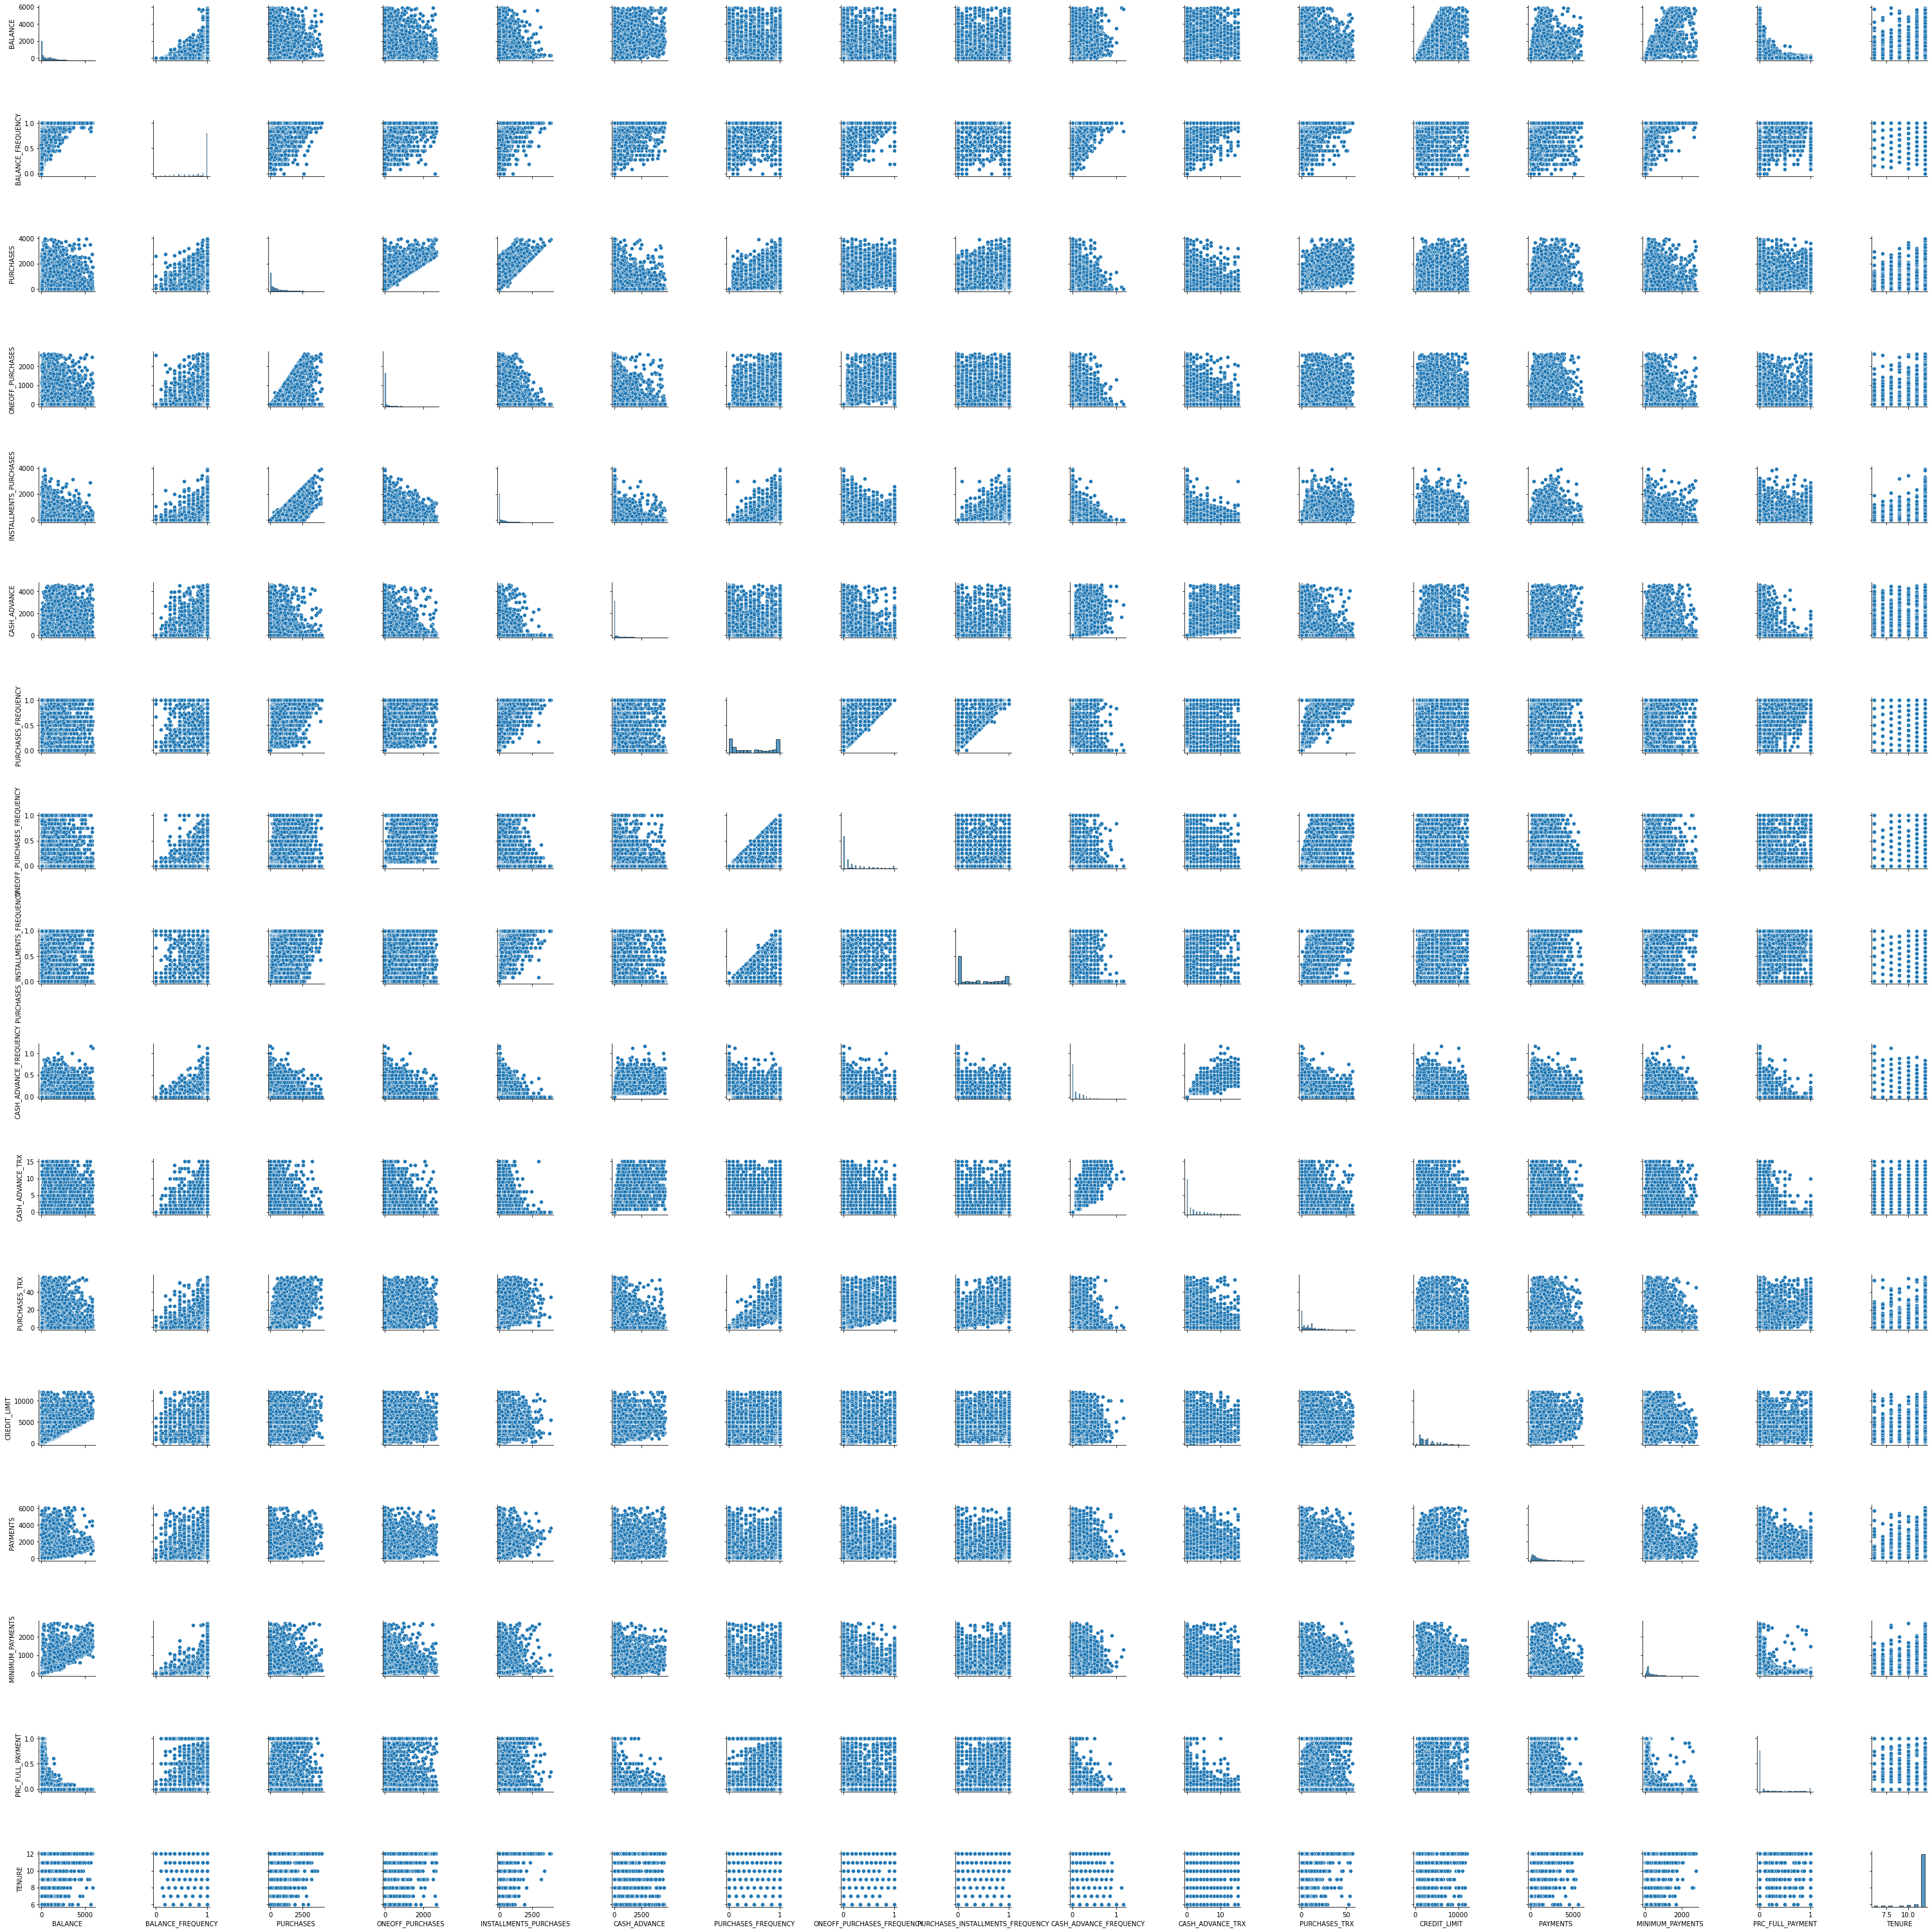

In [61]:
plt.figure(figsize=(15,15))
sns.pairplot(df_clean)
plt.show()


# 6) NORMALIZAÇÃO

In [67]:
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 6.1) Silhueta e Inertia

Text(0, 0.5, 'SILHUETA')

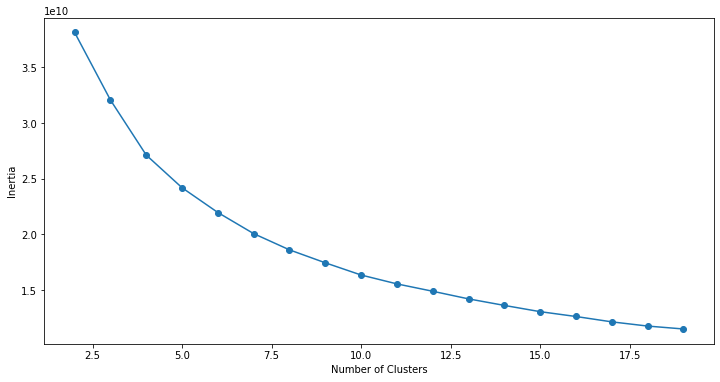

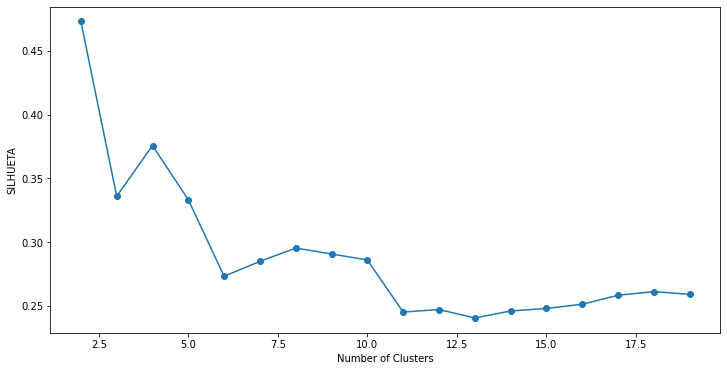

In [76]:
SILHUETA = []
SSE = []

for cluster in range(2, 20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_clean[columns])
    SSE.append(kmeans.inertia_)
    silhueta = silhouette_score(df_clean[columns], kmeans.labels_, 
                                metric='euclidean', random_state=42)
    SILHUETA.append(silhueta)

frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

frame = pd.DataFrame({'Cluster':range(2,20), 'SILHUETA':SILHUETA})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SILHUETA'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SILHUETA')